### Student details

Student name: Dylan Rodrigues

Student ID: 24121479

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [40]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [41]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

In [42]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

In [43]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


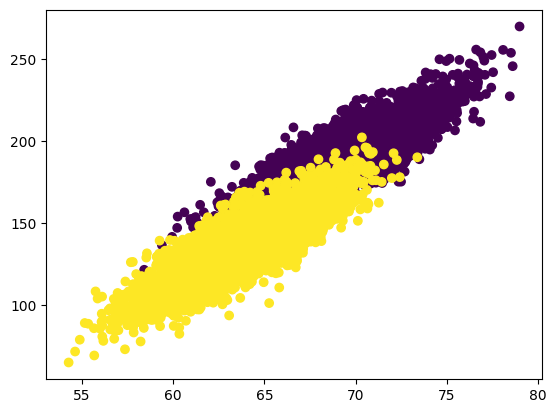

In [44]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [45]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the algorithm (Task)

In [46]:
################################
# Your code here
ppn = Perceptron(epochs=25, eta=0.01)
ppn.train(X_train, y_train)

In [47]:
y_pred = ppn.predict(X_test)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [48]:
################################
# Your code here
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8784848484848485

### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

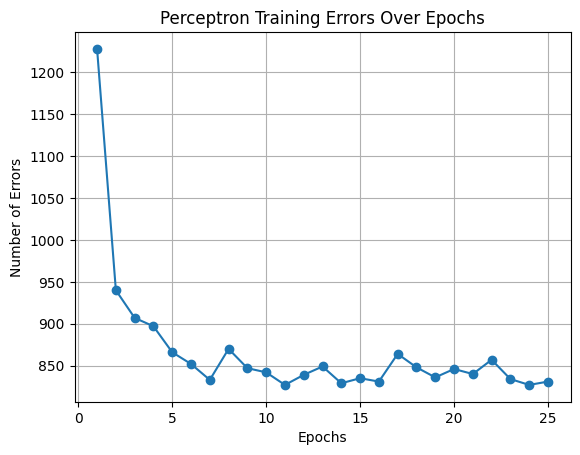

In [65]:
################################
# Your code here
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.title('Perceptron Training Errors Over Epochs')  # Title of the graph
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Number of Errors')  # Label for the y-axis
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

<h2>I have plotted multiple plots just for my understanding. The first four pictures could be ignored</h2>
Also note I have first tried to use plot_decision_regions(X_train, y_train, clf=ppn). But as discussed with Ciaran and lab asisstants/programmers, I have used matplot as well to plot the Same.

<Axes: >

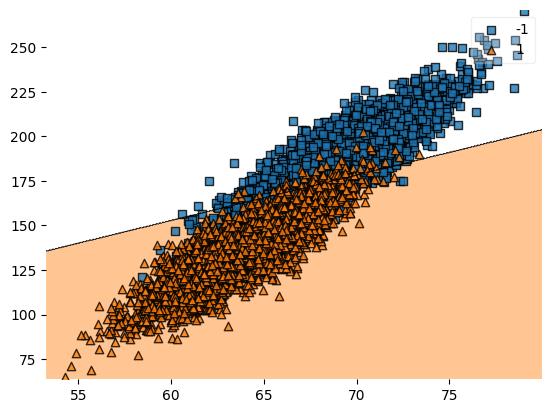

In [50]:
from mlxtend.plotting import plot_decision_regions
# TODO: check why a plot is getting rendered from X, y even when they are not declared
# here, I am just checking how the model worked on the training data
plot_decision_regions(X_train, y_train, clf=ppn)

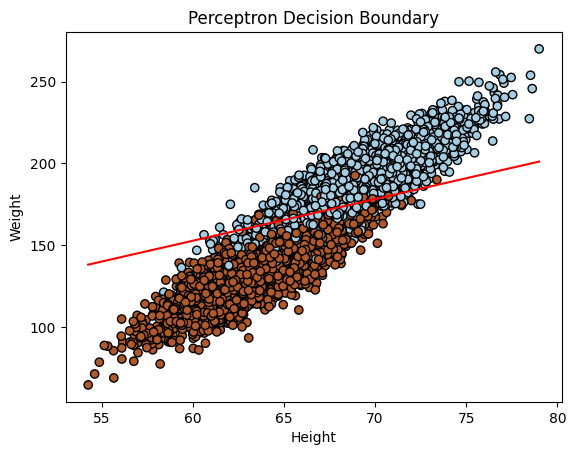

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

# Use the manually defined weights and bias
w = ppn.w_[1:]  # weights
b = ppn.w_[0]  # bias

# Plot the decision boundary (line) based on weights and bias
x_values = np.array([X_train[:, 0].min(), X_train[:, 0].max()])
y_values = -(w[0] * x_values + b) / w[1]

# Plot the decision line
plt.plot(x_values, y_values, color='red')

# Add labels
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Perceptron Decision Boundary')

plt.show()


<Axes: >

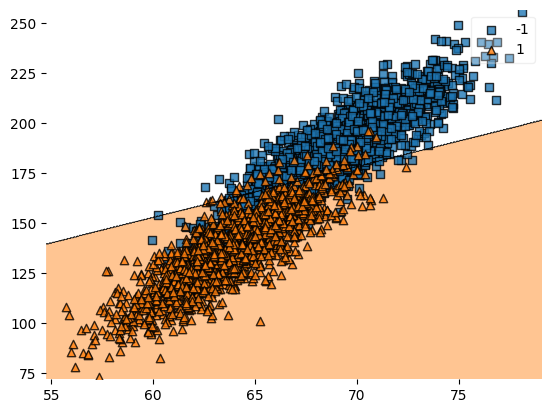

In [52]:
plot_decision_regions(X_test, y_test, clf=ppn)

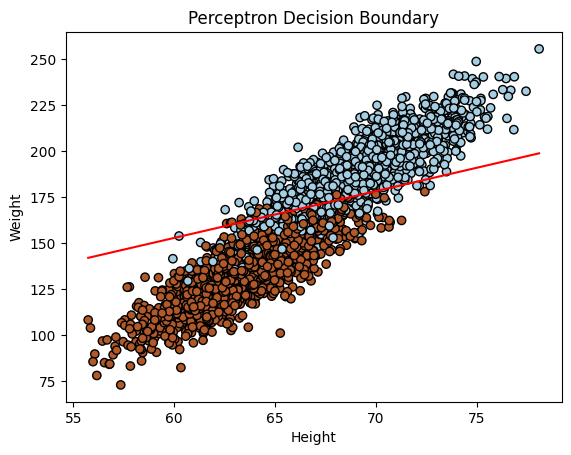

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)

# Use the manually defined weights and bias
w = ppn.w_[1:]  # weights
b = ppn.w_[0]  # bias

# Plot the decision boundary (line) based on weights and bias
x_values = np.array([X_test[:, 0].min(), X_test[:, 0].max()])
y_values = -(w[0] * x_values + b) / w[1]

# Plot the decision line
plt.plot(x_values, y_values, color='red')

# Add labels
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Perceptron Decision Boundary')

plt.show()

<Axes: >

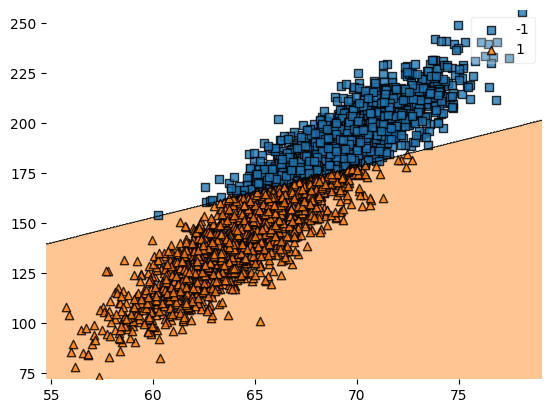

In [54]:
plot_decision_regions(X_test, y_pred, clf=ppn)

In [55]:
X_test.shape

(3300, 2)

In [56]:
y_pred.shape

(3300,)

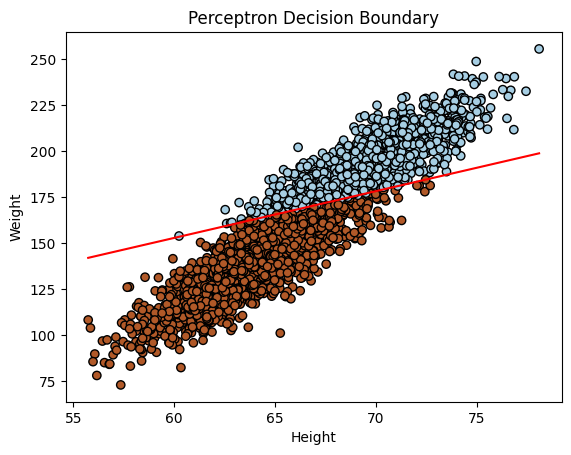

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)

# Use the manually defined weights and bias
w = ppn.w_[1:]  # weights
b = ppn.w_[0]  # bias

# Plot the decision boundary (line) based on weights and bias
x_values = np.array([X_test[:, 0].min(), X_test[:, 0].max()])
y_values = -(w[0] * x_values + b) / w[1]

# Plot the decision line
plt.plot(x_values, y_values, color='red')

# Add labels
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Perceptron Decision Boundary')

plt.show()

Generate random samples:

The foll. plot is not unnecessary. It is basically a top view of a multi-variate distribution. (in this case the variables are two i.e. height & weight.). It is a 2D gausian curve from where I am trying to generate 5000 samples. The values I have used to fit this distribution is such that the sampled values represent something close to the genders height weight dataset.

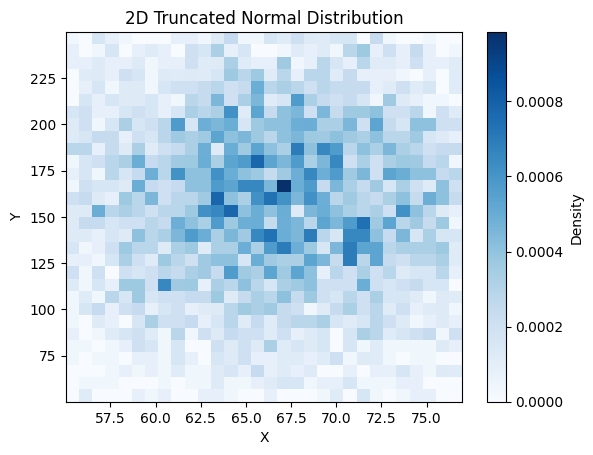

In [58]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

# parameters for the 2D normal distribution

# I have done a lot of calculations and inferences to get the values of 67, 160, 7, 50, 55, 77, 50, 250.
# It is very difficult to explain this in my notebook; I would be happy to disuss, in person, how I got arrived at these numbers.
mu_x, mu_y = 67, 160  # Means for x and y
sigma_x, sigma_y = 7, 50  # Standard deviations for x and y
lower_x, upper_x = 55, 77  # Truncation limits for x
lower_y, upper_y = 50, 250  # Truncation limits for y

# truncate for x dimension
a_x, b_x = (lower_x - mu_x) / sigma_x, (upper_x - mu_x) / sigma_x
x = truncnorm.rvs(a_x, b_x, loc=mu_x, scale=sigma_x, size=5000)

# truncate for y dimension
a_y, b_y = (lower_y - mu_y) / sigma_y, (upper_y - mu_y) / sigma_y
y = truncnorm.rvs(a_y, b_y, loc=mu_y, scale=sigma_y, size=5000)

# plot the results using a 2D histogram (heatmap)
plt.hist2d(x, y, bins=30, cmap='Blues', density=True)
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Truncated Normal Distribution')

# Show the plot
plt.show()

In [59]:
import pandas as pd
generated_heights_weights = pd.DataFrame(
    {
        "Height": x,
        "Weight": y,
    },
)

In [60]:
y_pred = ppn.predict(generated_heights_weights)

In [61]:
y_pred

array([-1, -1, -1, ...,  1,  1,  1])

In [62]:
generated_heights_weights.to_numpy()

array([[ 71.60210806, 197.16563937],
       [ 73.7338956 , 190.98508003],
       [ 58.89827724, 242.36577489],
       ...,
       [ 62.11325248,  71.4508191 ],
       [ 76.64276454,  66.81388375],
       [ 65.6555831 ,  89.46432676]])

<Axes: >

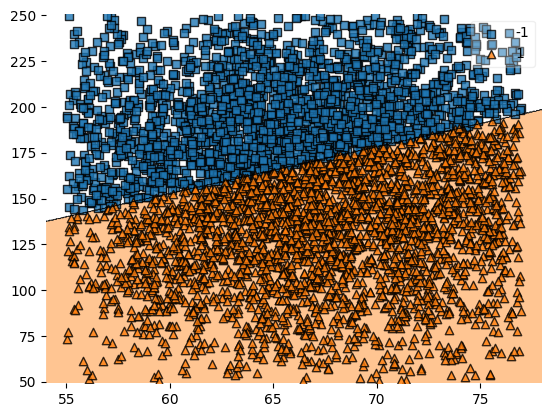

In [63]:
plot_decision_regions(generated_heights_weights.to_numpy(), y_pred, clf=ppn)

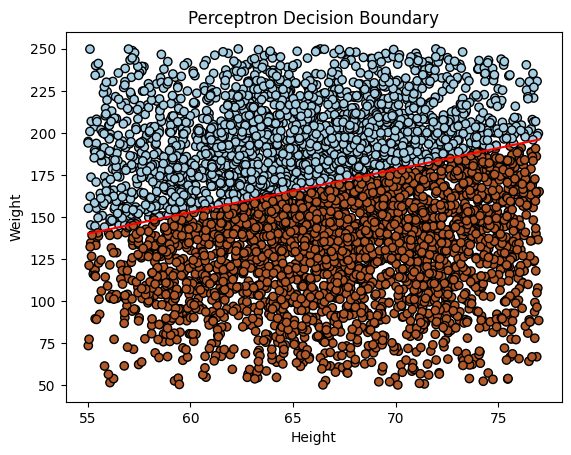

In [64]:
import numpy as np
import matplotlib.pyplot as plt

X_gen = generated_heights_weights.to_numpy()
# Plot the data points
plt.scatter(X_gen[:, 0], X_gen[:, 1], c=y_pred, edgecolors='k', cmap=plt.cm.Paired)

# Use the manually defined weights and bias
w = ppn.w_[1:]  # weights
b = ppn.w_[0]  # bias

# Plot the decision boundary (line) based on weights and bias
x_values = np.array([X_gen[:, 0].min(), X_gen[:, 0].max()])
y_values = -(w[0] * x_values + b) / w[1]

# Plot the decision line
plt.plot(x_values, y_values, color='red')

# Add labels
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Perceptron Decision Boundary')

plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


Ans 1:

As the training progresses, the ```Perceptron Training Errors Over Epochs``` graph shows that the number of errors decreases in the early epochs as the model learns to classify more instances correctly. After reaching a minimum (around the 7th epoch), the errors fluctuate slightly, indicating that the model is adjusting its weights, but struggles to achieve perfect classification due to possible overlapping or inseparable classes in the dataset.

This fluctuation happens because correcting one misclassified instance can cause others to be misclassified, especially if the data isn't ```linearly separable.```



Most (or rather all) of the training process is encapsulated in the train function definition of the Perceptron. A training set has multiple instances. The model (Perceptron) is trained on the set of training instances multiple times. A complete pass over a training set is known as an epoch.

In an epoch, we process all instances one at a time.
Let's see what happens as the algorithm is dealing with the an instance (xi). Firstly, a dot product is computed between w and xi. This product is then passed to an activation function that clips the output to 1 or -1 which is, essentially a prediction. The predicted value is compared (using subtraction) with the expected label. The trick here is that if the expected label is negative and the predicted label is positive, the expected label is made positive (by simple rules of how subtraction works). Depending on how fast we want our algorithm to work, a learning rate is multiplied to the difference which is eventually used to update the weights. The same trick would hold if the expected label is positive and the prediected label is negative. Once all the training instance are processed, the values of the weights correctly tuned such that the equation (converged weights)*x is a linear decision boundary that separates the negative instance from the positive instances.

For visualization purposes, we keep track of an errors variable. If a variable is misclassified we increase the count of the variable errors by 1 so that at the end of an epoch we get an idea of how well the model performed.

This is all about the mechanics behind training the perceptron.




Ans 2:

My understanding of why multiple training through multiple epochs is helpful:

Initially the weights are zero. Thus, although we itertate over all training instances, there can be a possibility that some instances might be missclassified. So it would take several passes to ensure that the weights converge to an optimal solution since the perceptron gets smarter by the time it has experienced a few epochs.

Sometimes, even though the weights are correctly updated while training some instances, it might hamper the weights that were correctly updated for older instances. Hence, training the model over multiple epochs might help to fix the previous weights that were affected.

Across different epochs we can shuffle the input data so that the modal is not overfitted. This is a kind of regularizarion technique.

The data that is fed into the model, moreover, might be noisy or might have a weird pattern. By iterating through the training data multiple times we can sure that the model is given an opportunity to witness more of patterns and variations in the data.



**Answer to the question that has been asked:**

Theoritically, the perceptron is gauranteed to converge to a solution. In the real world, the data might not be sufficient. Hence, several passes over the best amount of data we have might help the perceptron to converge.



There can be a possibility that at earlier epochs most of the instances were properly classified. But as soon as the perceptron tries to classify more instances, the older classified might be misclassified and hence the error of the later epoch or the last epoch might be higher than the error in the older epochs. The perceptron might, moreover, exhibit such behaviour in cases where the instances are not linearly separable.

Ans 3:

Perceptrons are gauranteed to converge only if the instances are ```linearly classify-able.``` The instances, however, are not linearly separable as observed in the plot of the training data (check the plot with yellow and purple instances - There is some overlap between the instances). Hence Zero error would only be possible if the perceptron converges and clearly classifies the instances. Since there are outliers, it seems that zero error cannot be achieved.